In [34]:
import logging
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import Callback
from keras.utils import to_categorical

In [35]:
# Function to compute and save statistics
def save_model_statistics(file_path, filters, biases, stage):
    with open(file_path, 'a') as f:
        f.write("-" * 100 + "\n")
        f.write(f"{stage}:\n\n")
        for i in range(2):
            mean = np.mean(filters[:, :, 0, i])
            variance = np.var(filters[:, :, 0, i])
            f.write(f"Kernel {i + 1} Weights:\n")
            f.write(f"Mean: {mean}\n")
            f.write(f"Variance: {variance}\n")

            mean = np.mean(biases[i])
            variance = np.var(biases[i])
            f.write(f"Kernel {i + 1} Biases:\n")
            f.write(f"Mean: {mean}\n")
            f.write(f"Variance: {variance}\n")

# Function to save weights
def save_model_weights(file_path, filters, biases, stage):
    with open(file_path, 'a') as f:
        f.write("-" * 10 + "\n")
        f.write(f"\n{stage}:\n")
        for i in range(2):
            x = (filters[:, :, 0, i])
            y = (biases[i])
            f.write(f"Kernel {i + 1}\n")
            f.write(f"\n{x}\n")
            f.write(f"\n{y}\n")

# Function to save kernel comparison images
def save_kernel_comparison_images(file_path, filters_before, filters_after):
    fig, axes = plt.subplots(2, 1, figsize=(10, 10))
    
    for i in range(2):
        ax = axes[i]
        kernel = np.concatenate([filters_before[:, :, 0, i], filters_after[:, :, 0, i]], axis=1)
        ax.imshow(kernel, cmap='gray')
        #plt.set_title(f'Kernel {i + 1}')
        for (x, z), val in np.ndenumerate(kernel):
            ax.text(z, x, f'{val:.4f}', ha='center', va='center', color='red', fontsize=8)
        ax.axis('off')

    plt.tight_layout()
    plt.savefig(file_path)
    plt.close()


In [36]:
class WeightsCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        weights = self.model.layers[0].get_weights()[0]
        bias = self.model.layers[0].get_weights()[1]
        print(f"\nEpoch {epoch + 1}:")
        print(f"Weights:\n{weights}")
        print(f"Bias:\n{bias}")
        print(f"Loss: {logs['loss']}")
        save_model_weights("5_weights.txt", weights, bias, epoch)


In [37]:
# Load MNIST data
mnist = keras.datasets.mnist
(x_full, y_full), (x_test_full, y_test_full) = mnist.load_data()

x_full = x_full.reshape(-1, 28, 28, 1)
x_test_full = x_test_full.reshape(-1, 28, 28, 1)
y_full = to_categorical(y_full, num_classes=10)
y_test_full=to_categorical(y_test_full, num_classes=10)

In [38]:
print(x_full.shape)
print(x_full[0].shape)
print(y_full.shape)
print(y_full[0])

(60000, 28, 28, 1)
(28, 28, 1)
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [39]:
model = models.Sequential()
model.add(layers.Conv2D(2, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

c:\Users\nandi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [40]:
weights_init=(model.layers[0].get_weights()[0])
bias_init=(model.layers[0].get_weights()[1])
print(f"Weights:\n{weights_init.shape}")
print(f"Bias:\n{bias_init.shape}")
print(f"Weights:\n{weights_init}")
print(f"Bias:\n{bias_init}")


Weights:
(3, 3, 1, 32)
Bias:
(32,)
Weights:
[[[[-0.08034655  0.13808663  0.09598096  0.11358024 -0.05105884
    -0.12863429  0.03700881 -0.00571667  0.08307512 -0.08828795
     0.08480278 -0.13553311  0.09368065  0.11124299  0.03352973
    -0.03579564  0.0580949   0.10905667  0.11697771 -0.01941589
    -0.0196817   0.1001388  -0.04776025 -0.0013942  -0.00311285
     0.11210762 -0.07806217 -0.10580872 -0.11396066 -0.11574923
     0.09872665  0.09977002]]

  [[-0.04715841 -0.11101826  0.07280977  0.09086762 -0.08233052
     0.0631038   0.00043349 -0.06702032 -0.02203823  0.03350292
     0.12253739  0.03564955 -0.08328258  0.03382383 -0.00492488
    -0.09262383  0.10750918 -0.0894026  -0.03058966  0.06535283
     0.07372151  0.11920471  0.06043734  0.10953762  0.11155443
    -0.10792132 -0.041402    0.05437462 -0.01297428  0.06090358
     0.00061871 -0.09913884]]

  [[-0.12948832  0.01482724 -0.1397595   0.07148911 -0.07906602
     0.09296349 -0.04646117  0.07405046  0.01539794  0.0218336

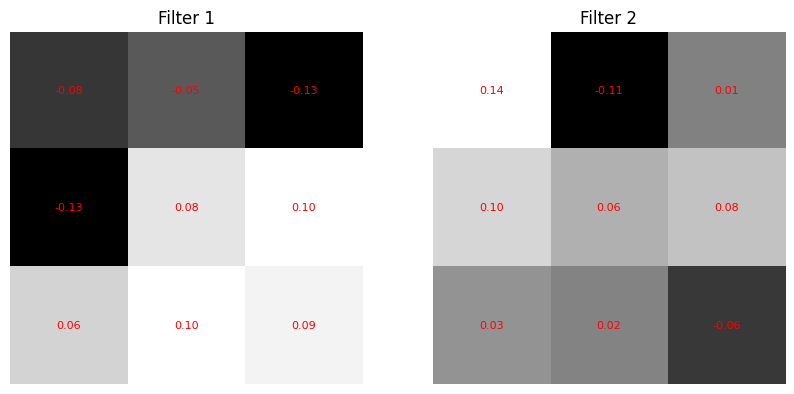

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

ax = axes[0]
ax.imshow(weights_init[:, :, 0, 0], cmap='gray')
ax.set_title('Filter 1')
ax.axis('off')
for (i, j), val in np.ndenumerate(weights_init[:, :, 0, 0]):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red', fontsize=8)

ax = axes[1]
ax.imshow(weights_init[:, :, 0, 1], cmap='gray')
ax.set_title('Filter 2')
ax.axis('off')
for (i, j), val in np.ndenumerate(weights_init[:, :, 0, 1]):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red', fontsize=8)
plt.show()

In [9]:
for i in range(2):
    mean = np.mean(weights_init[:, :, 0, i])
    variance = np.var(weights_init[:, :, 0, i])
    print(f"Conv Layer {i + 1} Weights:")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    
    mean = np.mean(bias_init[i])
    variance = np.var(bias_init[i])
    print(f"Conv Layer {i + 1} Biases:")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    print("-" * 30)

save_model_statistics('5.txt', weights_init, bias_init, 'Before Training')
save_model_weights('5_weights.txt', weights_init, bias_init, 'Before Training')

Conv Layer 1 Weights:
Mean: -0.09944692254066467
Variance: 0.032346323132514954
Conv Layer 1 Biases:
Mean: 0.0
Variance: 0.0
------------------------------
Conv Layer 2 Weights:
Mean: 0.16775982081890106
Variance: 0.049484413117170334
Conv Layer 2 Biases:
Mean: 0.0
Variance: 0.0
------------------------------


In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_full, y_full, epochs=10, callbacks=[WeightsCallback()])

Epoch 1/10
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8088 - loss: 9.4152
Epoch 1:
Weights:
[[[[ 0.03905184  0.09676948]]

  [[ 0.16286163 -0.00996063]]

  [[ 0.00386037  0.01716947]]]


 [[[-0.12799855 -0.18086097]]

  [[-0.02069948  0.06661094]]

  [[-0.1713686   0.11376955]]]


 [[[-0.11285254  0.13826707]]

  [[-0.1077035  -0.07070433]]

  [[-0.25632402 -0.0571705 ]]]]
Bias:
[-0.00488026 -0.24892187]
Loss: 3.1564648151397705
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8089 - loss: 9.4051
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9314 - loss: 0.3311
Epoch 2:
Weights:
[[[[ 0.01397713  0.03373458]]

  [[ 0.08805162  0.00360706]]

  [[-0.01165214  0.00355999]]]


 [[[-0.08446506 -0.05774603]]

  [[ 0.01424882  0.02617101]]

  [[-0.07217412  0.0400626 ]]]


 [[[-0.08720834  0.04166717]]

  [[-0.12539752 -0.01796403]]

  [[-0.08781485 -0.01704293]]]]
Bias:
[ 0.00278624 -0.20177868]
Loss: 0.28366634249687195
1875/1875 ━━━━━━━━━━━━━━━━━━

In [11]:
weights_final=(model.layers[0].get_weights()[0])
bias_final=(model.layers[0].get_weights()[1])
print(f"Weights:\n{weights_final}")
print(f"Bias:\n{bias_final}")

Weights:
[[[[-0.01136156  0.00697402]]

  [[ 0.04909201  0.00462327]]

  [[ 0.00775746 -0.01635584]]]


 [[[-0.03457316 -0.02541073]]

  [[ 0.01867523  0.01709162]]

  [[-0.03640423  0.02897108]]]


 [[[-0.05410308  0.01241665]]

  [[-0.08275276  0.00048587]]

  [[-0.01827537 -0.00747061]]]]
Bias:
[ 0.14548723 -0.43240392]


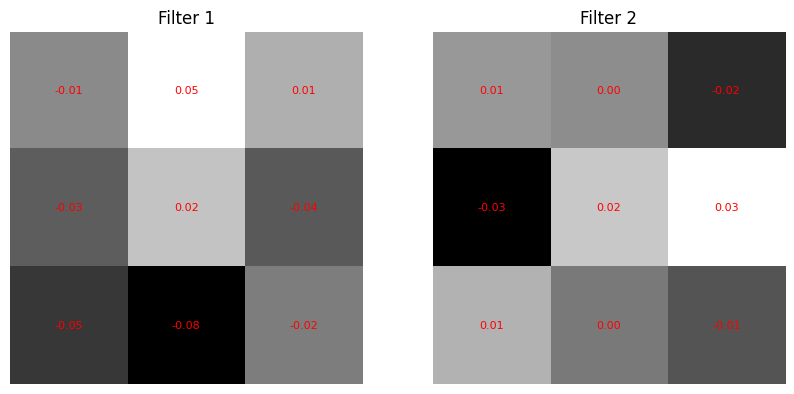

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes[0]
ax.imshow(weights_final[:, :, 0, 0], cmap='gray')
ax.set_title('Filter 1')
ax.axis('off')
for (i, j), val in np.ndenumerate(weights_final[:, :, 0, 0]):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red', fontsize=8)
ax = axes[1]
ax.imshow(weights_final[:, :, 0, 1], cmap='gray')
ax.set_title('Filter 2')
ax.axis('off')
for (i, j), val in np.ndenumerate(weights_final[:, :, 0, 1]):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red', fontsize=8)
plt.show()

In [13]:
for i in range(2):
    mean = np.mean(weights_final[:, :, 0, i])
    variance = np.var(weights_final[:, :, 0, i])
    print(f"Conv Layer {i + 1} Weights:")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    
    mean = np.mean(bias_final[i])
    variance = np.var(bias_final[i])
    print(f"Conv Layer {i + 1} Biases:")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    print("-" * 30)

save_model_statistics('5.txt', weights_final, bias_final, 'After Training')
save_model_weights('5_weights.txt', weights_final, bias_final, 'After Training')
save_kernel_comparison_images('5.png', weights_init, weights_final)

Conv Layer 1 Weights:
Mean: -0.017993943765759468
Variance: 0.0014070821925997734
Conv Layer 1 Biases:
Mean: 0.1454872339963913
Variance: 0.0
------------------------------
Conv Layer 2 Weights:
Mean: 0.002369481837376952
Variance: 0.00025270742480643094
Conv Layer 2 Biases:
Mean: -0.43240392208099365
Variance: 0.0
------------------------------


In [14]:
test_loss, test_acc = model.evaluate(x_test_full, y_test_full)
print(f'Test accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9432 - loss: 0.2480
Test accuracy: 0.9509999752044678


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


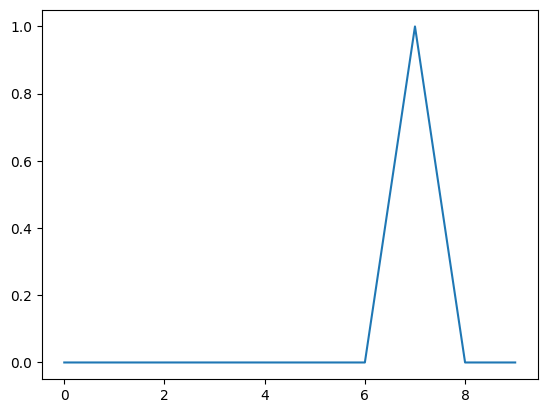

In [33]:
predictions = model.predict(x_test_full)
plt.plot((predictions[0])) 


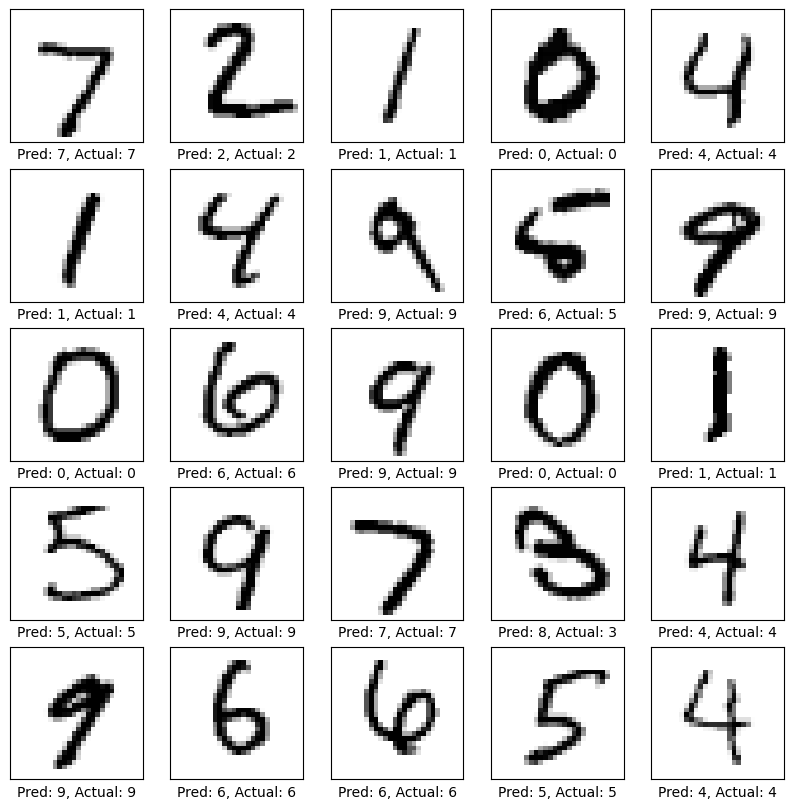

In [16]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_full[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test_full[i])}")
plt.show()


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

image = x_test_full[0]
image = image[:, :, 0]

kernel = weights_final[:,:,0,1]

print(kernel)
print(image.shape)

[[ 0.00697402  0.00462327 -0.01635584]
 [-0.02541073  0.01709162  0.02897108]
 [ 0.01241665  0.00048587 -0.00747061]]
(28, 28)


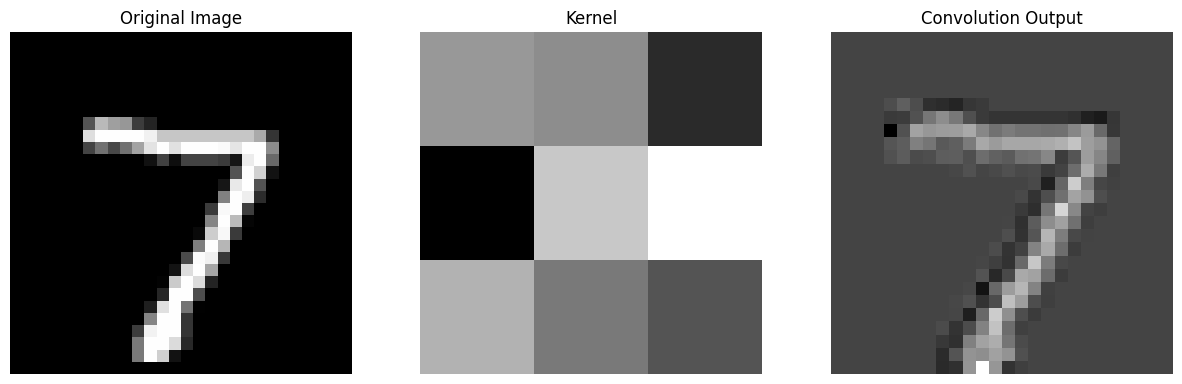

In [27]:


# Perform the convolution operation with no padding and stride of 1
convolved_output = convolve2d(image, kernel, mode='valid')

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axs[0].imshow(image, cmap='gray', interpolation='none')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Kernel
axs[1].imshow(kernel, cmap='gray', interpolation='none')
axs[1].set_title('Kernel')
axs[1].axis('off')

# Convolution output
axs[2].imshow(convolved_output, cmap='gray', interpolation='none')
axs[2].set_title('Convolution Output')
axs[2].axis('off')

plt.show()


In [29]:
from tensorflow.keras.models import Model
dense_layer_model = Model(inputs=model.input, outputs=model.get_layer(index=2).output)

# Generate dummy input data
input_data =  x_test_full[0]
model.build((None, 28, 28, 1))
# Get the output of the dense layer
dense_output = dense_layer_model.predict(input_data)

# Print the shape and values of the dense output
print("Dense layer output shape:", dense_output.shape)
print("Dense layer output values:", dense_output)

# Visualize the output of the dense layer
plt.figure(figsize=(10, 6))
plt.bar(range(dense_output.shape[1]), dense_output[0])
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Dense Layer Output')
plt.xticks(range(dense_output.shape[1]), [f'Class {i}' for i in range(dense_output.shape[1])])
plt.show()

ValueError: The layer sequential has never been called and thus has no defined input.